<a href="https://colab.research.google.com/github/liyachittilappilly/KNN-Classification/blob/main/KNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
d = pd.read_csv("/content/defaulter.csv")
d.head()

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(d[features_to_scale])
d["norm_balance"] = scaled_values[:,0]
d["norm_income"] = scaled_values[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
d_filtered = d[d['defaulter'] != 'unknown'].copy()
X = d_filtered[["norm_balance", "norm_income"]]
Y = d_filtered['defaulter']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

✅ **2. What is GridSearchCV?**

GridSearchCV is a smart tool in machine learning that helps us find the best combination of parameters for a model.
It does this using a method called **cross-validation**, where the training data is split into smaller parts. The model is trained and tested multiple times on these parts, which helps avoid two common problems:

* **Overfitting** – when the model is too focused on the training data and fails on new data
* **Underfitting** – when the model is too simple to learn the patterns properly


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 15,2)}

knn_gscv = GridSearchCV(knn, param_grid,return_train_score=True, verbose=1,scoring='accuracy')

knn_gscv.fit(X_train,Y_train)

df=pd.DataFrame(knn_gscv.cv_results_)
df=df[['param_n_neighbors','mean_train_score','mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_sc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
model.fit(X_train,Y_train)
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)

0.875 0.5


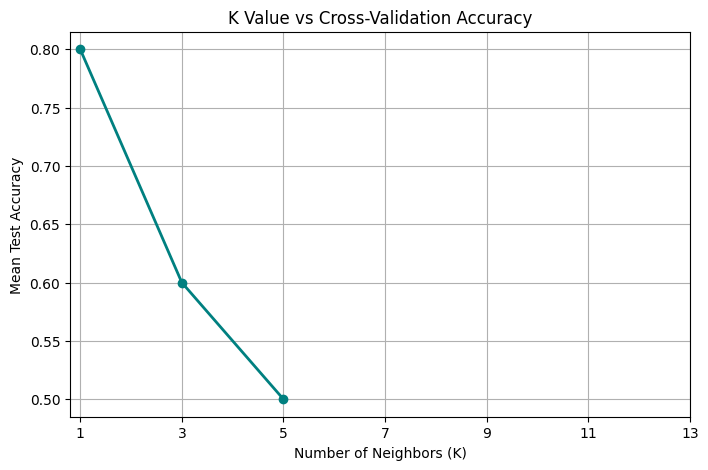

In [ ]:
import matplotlib.pyplot as plt

k_values = df['param_n_neighbors']
test_scores = df['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(k_values, test_scores, marker='o', color='teal', linestyle='-', linewidth=2)
plt.title("K Value vs Cross-Validation Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Test Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()